In [1]:
# conda: gridTools xesmfTools

# cd to the 'lib' directory in your notebooks directory
# $ export LIBROOT=`pwd`
# Start jupyter lab from any directory
import sys, os
if (os.environ.get('LIBROOT')):
    sys.path.append(os.environ.get('LIBROOT'))

    from sysInfo import sysInfo
info = sysInfo()
info.show(vList=['platform','python','esmf','esmpy','xgcm','xesmf',
                 'netcdf4','numpy','xarray',
                 'cartopy','matplotlib',
                 'jupyter_core','jupyterlab','notebook',
                 'dask'])
    
from gridUtils import gridUtils

System name                             : Linux
System name                             : mom6vm
Operating system release                : 5.8.0-45-generic
Operating system version                : #51~20.04.1-Ubuntu SMP Tue Feb 23 13:46:31 UTC 2021
Hardware identifier                     : x86_64
Active conda environment                : xesmfTools
Conda reported versions of software:
platform                                : linux-64
python                                  : 3.7.10
esmf                                    : 8.0.1
esmpy                                   : 8.0.1
xgcm                                    : not installed
xesmf                                   : 0.5.2
netcdf4                                 : 1.5.6
numpy                                   : 1.20.1
xarray                                  : 0.17.0
cartopy                                 : 0.18.0
matplotlib                              : 3.3.4
jupyter_core                            : 4.7.1
jupyterlab          

In [2]:
grd = gridUtils()
grd.verboseLevel = 1
grd.debugLevel = 1

In [3]:
# gridParameters dictionary
#   lonGridCenter <float>
#   latGridCenter <float>
#   gridUnits: ['degrees','meters']
#   lonSpan <float>
#   latSpan <float>
#   spanUnits: ['degrees','meters','gridcells']
#   gridProjection: ['LambertConformalConic','LambertConformalConicTilt','Mercator','NorthPoleStereo']
#   projLat1: <degrees> [First standard parallel (LambertConformalConic)]
#   projLat2: <degrees> [Second standard parallel (LambertConformalConic)]
#   projLon0: <degrees> [Longitude of projection center (LambertConformalConic)]
#   projLat0: <degrees> [Latitude of projection center (LambertConformalConic)]
#   projLatTS: <degrees> [Latitude of true scale (NorthPoleStereo)]
#   gridTilt: <degrees> [(Mercator)]
#   nominalResolution: <float> [Inverse of nominal resolution]
#   nominalSpacing: <int> [2 for supergrid]

# plotParameters dictionary
#   showGrid
#     True: show all vertices

In [4]:
grd.resetGrid()

# Specify the grid parameters
# nominalSpacing should be 2.0 for supergrid
grd.setGridParameters({
    'gridProjection': 'LambertConformalConicTilt',
    'lonGridCenter': 230.0,
    'latGridCenter': 40.0,
    'lonSpan': 20.0,
    'latSpan': 30.0,
    'spanUnits': 'gridcells',
    'nominalResolution': 1.0,
    'nominalSpacing': 2.0,
    'gridTilt': 30.0
})

In [5]:
# This forms a grid in memory using the specified grid parameters
grd.makeGrid()

Generating regular lat-lon grid centered at 230.00 0.00 on equator.
   Generated regular lat-lon grid between latitudes -15.00 15.00
   Number of js=61


In [6]:
grd.showGridParameters()

Current grid parameters:
       lonGridCenter: 230.0
       latGridCenter: 40.0
             lonSpan: 20.0
             latSpan: 30.0
            gridTilt: 30.0
      gridProjection: LambertConformalConicTilt
           spanUnits: points
   nominalResolution: 1.0
      nominalSpacing: 2.0
            projLon0: 230.0
            projLat1: 25.0
            projLat2: 55.0


In [7]:
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'view': 'NearsidePerspective',
        'central_latitude': 40.0,
        'central_longitude': 230.0,
        'extent': [-160.0 ,-100.0, 60.0, 20.0],
        'iLinewidth': 1.0,
        'jLinewidth': 1.0,
        'showGrid': True,
        'title': "Nearside Perspective: 20x30 with 30 degree tilt",
        'iColor': 'k',
        'jColor': 'k'
    }
)

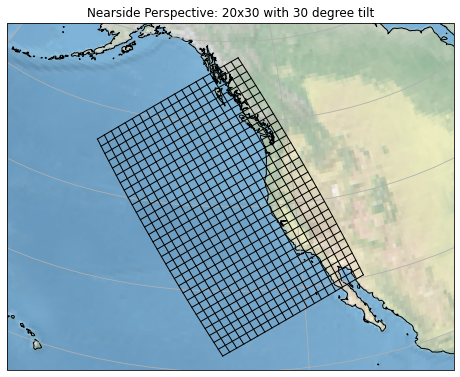

In [8]:
grd.plotGrid()

In [9]:
# Plot last grid also on a Mercator projection
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'view': 'Mercator',
        'central_latitude': 40.0,
        'central_longitude': 230.0,
        'extent': [-160.0 ,-100.0, 60.0, 20.0],
        'iLinewidth': 1.0,
        'jLinewidth': 1.0,
        'showGrid': True,
        'title': "Mercator projection: 20x30 with 30 degree tilt",
        'iColor': 'k',
        'jColor': 'k'
    }
)

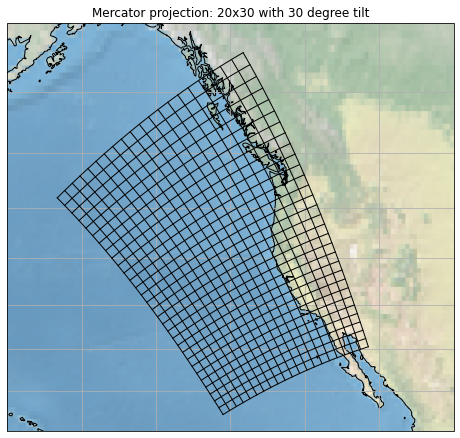

In [10]:
grd.plotGrid()

In [11]:
# Show in Lambert Conformal Conic
# It appears that the standard parallels are computed on the fly.
# (latGridCenter - (latSpan/2), latGridCenter + (latSpan/2))
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'view': 'LambertConformalConic',
        'central_longitude': 230.0,
        'standard_parallels': (25, 55),
        'extent': [-160.0 ,-100.0, 60.0, 20.0],
        'iLinewidth': 0.5,
        'jLinewidth': 1.0,
        'showGrid': True,
        'title': 'Lambert Conformal Conic: 20x30 with 30 degree tilt',
        'iColor': 'r',
        'jColor': 'b'
    }
)

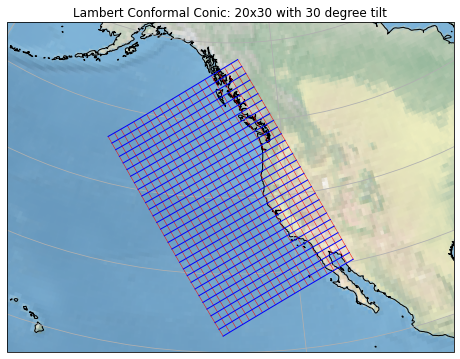

In [12]:
grd.plotGrid()

In [13]:
# Arctic Grid #6
# Demonstration of a North Polar Stereo projection grid
# Central longitude of 160.0
# True scale latitude is currently unknown
arctic6 = '/home/cermak/gridtools/gridTools/configs/Arctic6/ocean_hgrid.nc'
grd.openDataset(arctic6)
grd.readGrid()

In [14]:
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'view': 'NorthPolarStereo',
        'extent': [-180, 180, 38, 90],
        'central_longitude': 160.0,
        'iLinewidth': 0.5,
        'jLinewidth': 1.0,
        'showGrid': False,
        'title': 'North Polar Stereo: Arctic6',
        'iColor': 'r',
        'jColor': 'b'
    }
)

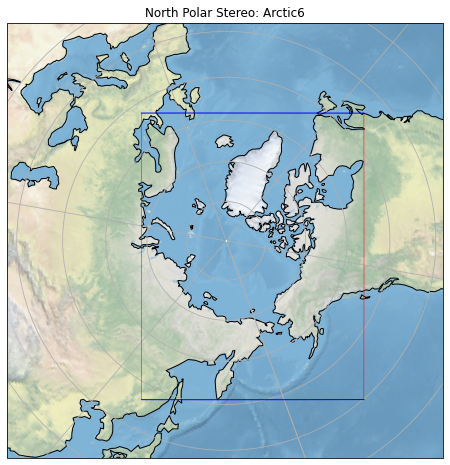

In [15]:
grd.plotGrid()

In [16]:
# NEP7: North East Pacific Grid #7
# Demonstration of Lambert Conformal Conic projection
nep7 = '/home/cermak/gridtools/gridTools/configs/NEP7/ocean_hgrid.nc'
grd.openDataset(nep7)
grd.readGrid()

In [17]:
grd.setPlotParameters(
    {
        'figsize': (8,8),
        'view': 'LambertConformalConic',
        'central_longitude': -91.0,
        'standard_parallels': (40, 60),
        'extent': [-180, 180, 10.5, 90],
        'iLinewidth': 0.5,
        'jLinewidth': 1.0,
        'showGrid': False,
        'title': 'Lambert Conformal Conic: NEP7',
        'iColor': 'r',
        'jColor': 'b'
    }
)

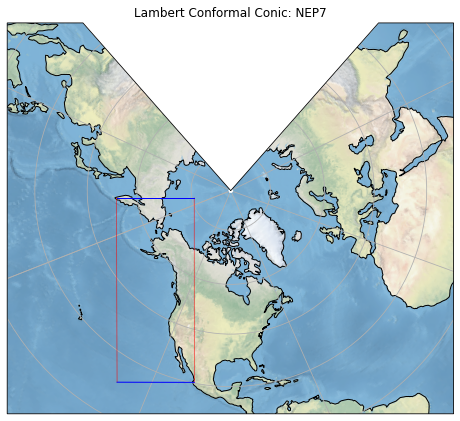

In [18]:
grd.plotGrid()